In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

In [ ]:
# set up dataframe
df = pd.read_csv('../data/clean/nearest-neighbor.csv')
factors = [2, 4, 6, 8]
df = df[df['factor'].isin(factors)] \
  .transpose() \
  .drop('factor') \
  .div(5) # benchmark collected 5 seconds of data, convert to 1s
  
df.columns = factors
df_relative = df.div(df.loc['gpu'], axis=1) * 100

,2,4,6,8
cpu,339.12,621.28,733.40,778.28
gpu,3772.58,8526.78,10452.28,15778.74


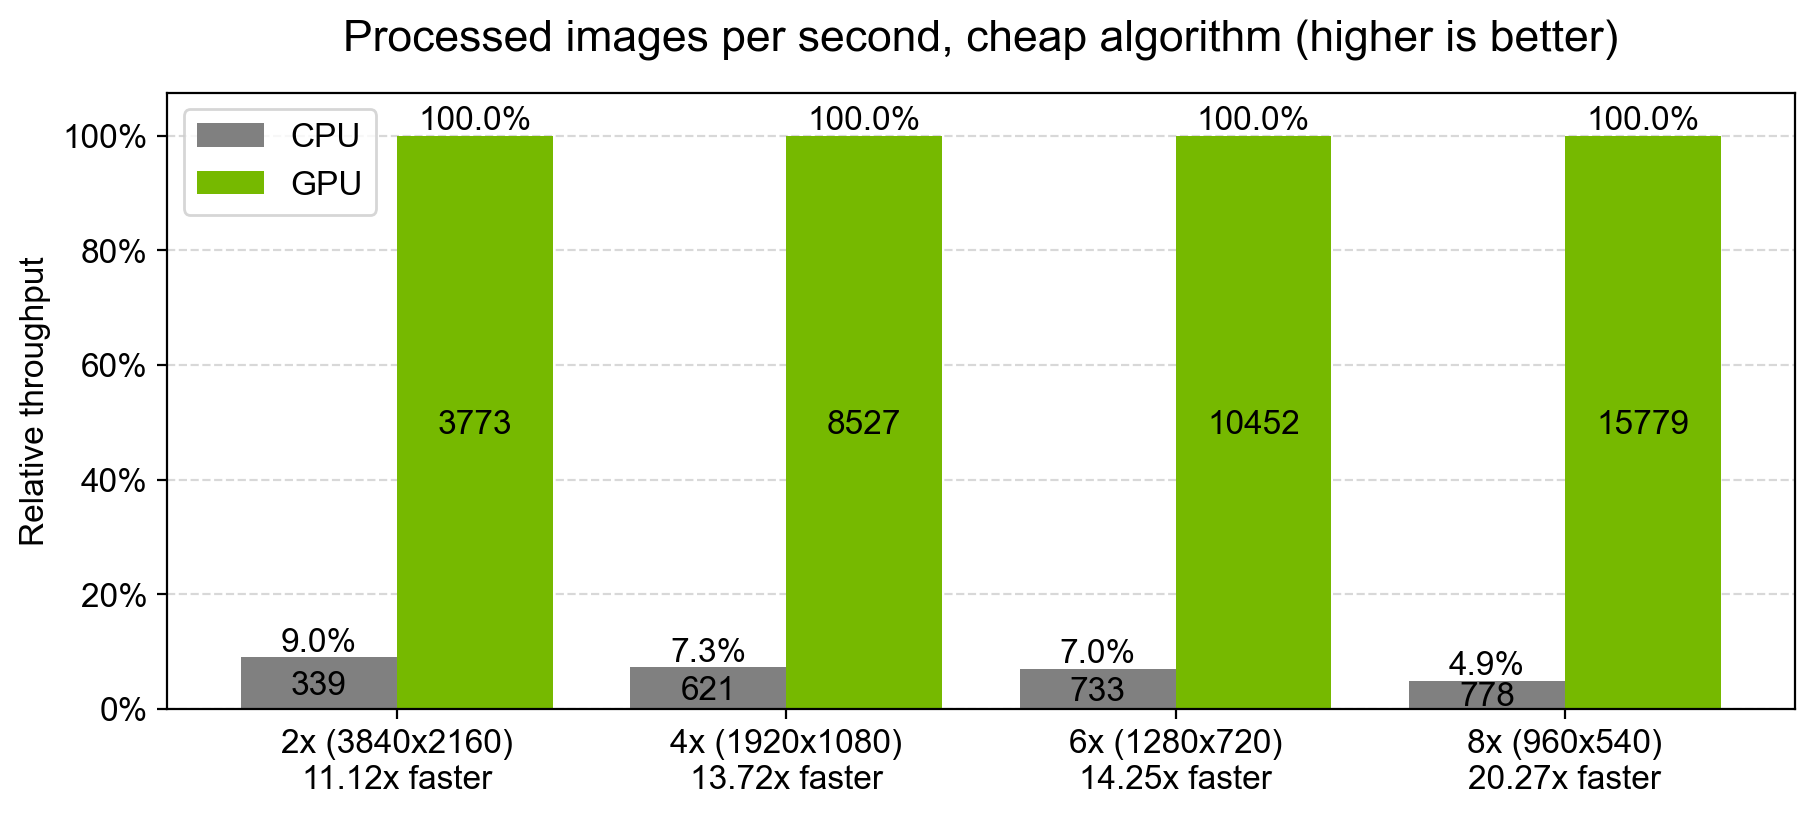

In [27]:
ax: plt.Axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10.5, 4), dpi=200)

plt.title("Processed images per second, cheap algorithm (higher is better)", pad=15, size=16)
ax.set_axisbelow(True)

# x axis
cases = np.arange(len(factors))
ax.set_xticks(cases, [f'{x}x ({int(7680/x)}x{int(4320/x)})' for x in factors])

# y axis
yticks = range(0, 101, 20)
ax.set_yticks(yticks, labels=[str(i) + '%' for i in yticks])
ax.set_ylabel("Relative throughput")
ax.grid(axis='y', which='major', visible=True, linestyle='--', color='grey', alpha=0.3)

# bars
ax.bar(cases - 0.2, df_relative.loc['cpu'], 0.4, label='CPU', color='grey')
ax.bar(cases + 0.2, df_relative.loc['gpu'], 0.4, label='GPU', color='#76B900')
ax.legend()

# annotated test
for i, case in enumerate(factors):
    kw = { 'color': 'black', 'horizontalalignment': 'center' }
    df_case = df.loc[:, case]
    df_case_rel = df_relative.loc[:, case]

    # absolute values
    ax.text(i - 0.2, (df_case_rel.loc['cpu'] / 2) - 2, round(df_case.loc['cpu']), **kw)
    ax.text(i + 0.2, (df_case_rel.loc['gpu'] / 2) - 2, round(df_case.loc['gpu']), **kw)

    # percentages
    ax.text(i - 0.2, df_case_rel['cpu'] + 1, str(round(df_case_rel['cpu'], 1)) + '%', **kw)
    ax.text(i + 0.2, df_case_rel['gpu'] + 1, str(round(df_case_rel['gpu'], 1)) + '%', **kw)

    # speedup
    speedup = df_case_rel['gpu'] / df_case_rel['cpu']
    ax.text(i, -14, f'{round(speedup, 2)}x faster', **kw)

ax.margins(0.05, 0.075)
plt.show()
